## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merged_data = mouse_metadata.merge(study_results, how = "outer", on = ["Mouse ID"])

# Display the data table for preview
mouse_merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_merged_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
# Checking the number of mice.
mice_count = mouse_merged_data.drop_duplicates(subset=["Mouse ID"]).count()
mice_count

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_drop_dup = mouse_merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mice_drop_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup = mouse_merged_data[mouse_merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]
mouse_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID checking the number of mice in the clean DataFrame.
mice_drop_dup.sample(20).sort_values(by=["Drug Regimen", "Mouse ID"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
199,i738,Capomulin,Female,23,20,20,38.531136,0
279,l897,Capomulin,Male,17,19,30,39.352792,1
368,s710,Capomulin,Female,1,23,35,44.160519,1
1256,o287,Ceftamin,Male,2,28,25,52.068486,3
1400,q483,Ceftamin,Male,6,26,10,47.839101,1
528,a577,Infubinol,Female,6,25,20,52.365185,2
941,i386,Infubinol,Female,23,29,0,45.000000,0
1640,v766,Infubinol,Male,16,27,15,51.542431,1
1193,m550,Ketapril,Male,18,28,45,69.253503,4
1626,v603,Ketapril,Female,22,30,30,57.990554,1


## Summary Statistics

In [9]:
mouse_tumor_summary = mouse_merged_data.groupby(["Drug Regimen"])

#Calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_tumor_mean = mouse_tumor_summary["Tumor Volume (mm3)"].mean()
mouse_tumor_median = mouse_tumor_summary["Tumor Volume (mm3)"].median()
mouse_tumor_var = mouse_tumor_summary["Tumor Volume (mm3)"].var()
mouse_tumor_std = mouse_tumor_summary["Tumor Volume (mm3)"].std()
mouse_tumor_sem = mouse_tumor_summary["Tumor Volume (mm3)"].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_tumor_summaryStats = pd.DataFrame({"Mean":mouse_tumor_mean,
                                        "Median":mouse_tumor_median,
                                        "Variance":mouse_tumor_var,
                                        "Standard Dev":mouse_tumor_std,
                                        "SEM": mouse_tumor_sem})
mouse_tumor_summaryStats

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
mouse_tumor_summary.agg({"Tumor Volume (mm3)":['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

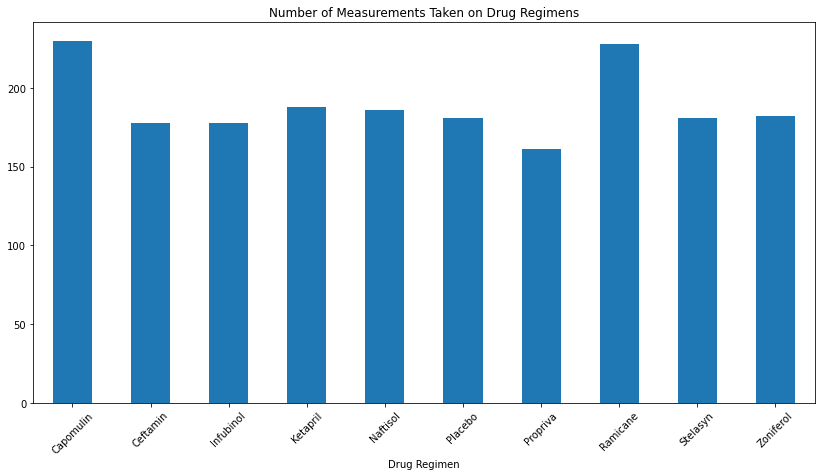

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_measure = mouse_merged_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
drug_regimen_measure.plot(kind = "bar", rot = 45, figsize = (14,7), title = "Number of Measurements Taken on Drug Regimens")

Text(0, 0.5, 'Mouse Count')

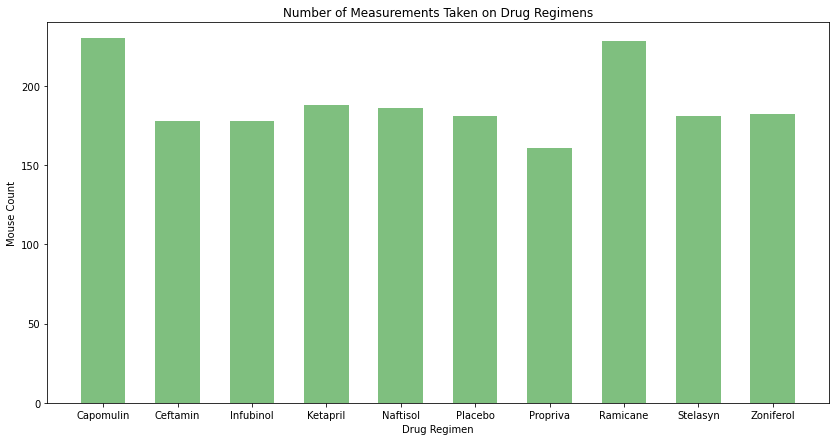

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_regimen_measure))
tick_locations = [value for value in x_axis]
groupings = mouse_merged_data["Drug Regimen"].drop_duplicates().sort_values()

plt.figure(figsize=(14,7))
plt.bar(x_axis, drug_regimen_measure, color = "g", alpha=0.5, align = "center", width = 0.6)
plt.xticks(tick_locations, groupings, rotation = 0)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(drug_regimen_measure)+10)

plt.title("Number of Measurements Taken on Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

Text(0, 0.5, ' ')

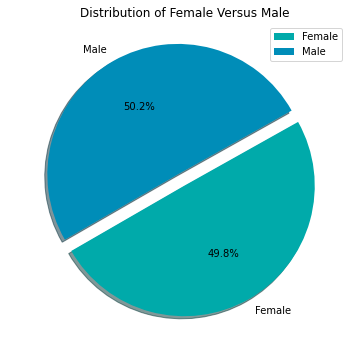

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_dist = mouse_merged_data[["Mouse ID", "Sex"]].drop_duplicates(subset = ["Mouse ID", "Sex"]).groupby("Sex").count()
male_female_dist.columns = ["Total Count"]
male_female_dist["Percent of Sex"] = ((male_female_dist["Total Count"] / male_female_dist["Total Count"].sum())*100)

male_female_pie = male_female_dist.plot(kind = "pie", y = "Total Count", figsize=(6,6), title = "Distribution of Female Versus Male", 
                        autopct="%1.1f%%", colors = ["#00AAAA", "#008DB8"], startangle=210, explode = (0, 0.10), shadow = True)

male_female_pie.set_ylabel(" ")

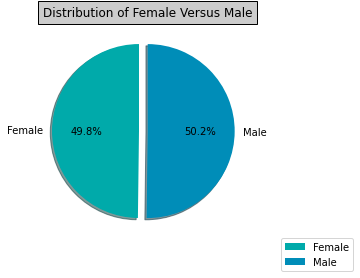

In [14]:
# Labels for the sections of our pie chart
labels = mouse_merged_data["Sex"].drop_duplicates().sort_values(ascending = True)

# The values of each section of the pie chart
sizes = male_female_dist["Percent of Sex"].sort_values()

# The colors of each section of the pie chart
colors = ["#00AAAA", "#008DB8"]

# Tells matplotlib to seperate the "Sex" section from the others
explode = (0.1, 0)

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Distribution of Female Versus Male", bbox={'facecolor':'0.8', 'pad':5})
plt.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure)

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_keeps = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
best_drug = mouse_merged_data[["Drug Regimen","Mouse ID", "Timepoint", "Tumor Volume (mm3)"]].sort_values(by = ["Drug Regimen","Mouse ID", "Timepoint"])
best_drug = best_drug.loc[best_drug["Drug Regimen"].isin(drug_keeps)]

best_drug

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
300,Capomulin,b128,0,45.000000
301,Capomulin,b128,5,45.651331
302,Capomulin,b128,10,43.270852
303,Capomulin,b128,15,43.784893
304,Capomulin,b128,20,42.731552
...,...,...,...,...
80,Ramicane,z578,25,37.414114
81,Ramicane,z578,30,37.815935
82,Ramicane,z578,35,38.504824
83,Ramicane,z578,40,34.022093


In [16]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = best_drug[["Drug Regimen", "Tumor Volume (mm3)",
"Mouse ID", "Timepoint"]].groupby(["Mouse ID", "Drug Regimen"])[["Timepoint","Tumor Volume (mm3)"]].last()
max_timepoint

,,Timepoint,Tumor Volume (mm3)
Mouse ID,Drug Regimen,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543
...,...,...,...
y769,Ceftamin,45,68.594745
y793,Capomulin,45,31.896238
y865,Ceftamin,45,64.729837


In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_mouse_merge = pd.merge(max_timepoint, mouse_merged_data, how = "left", on = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"])
new_mouse_merge.sample(12).sort_values(by=["Drug Regimen","Mouse ID"])

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
9,b128,45,38.982878,Capomulin,Female,9,22,2
12,b742,45,38.939633,Capomulin,Male,7,21,0
24,f966,20,30.485985,Capomulin,Male,16,17,0
72,s710,45,40.728578,Capomulin,Female,1,23,1
11,b487,25,56.057749,Ceftamin,Female,6,28,1
39,k210,45,68.923185,Ceftamin,Male,15,28,3
59,p438,45,61.433892,Ceftamin,Female,11,26,1
93,y163,45,67.685569,Infubinol,Female,17,27,3
5,a520,45,38.810366,Ramicane,Male,13,21,1
16,c458,30,38.342008,Ramicane,Female,23,20,2


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_drug = new_mouse_merge.loc[new_mouse_merge["Drug Regimen"] == "Capomulin",:]

quartiles = capomulin_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
ceftamin_drug = new_mouse_merge.loc[new_mouse_merge["Drug Regimen"] == "Ceftamin",:]

quartiles = ceftamin_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 48.72207785
The upper quartile of Tumor Volume is: 64.29983003
The interquartile range of Tumor Volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [20]:
infubinol_drug = new_mouse_merge.loc[new_mouse_merge["Drug Regimen"]== "Infubinol",:]

quartiles = infubinol_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
ramicane_drug = new_mouse_merge.loc[new_mouse_merge["Drug Regimen"] == "Ramicane",:]

quartiles = ramicane_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [22]:
# Put treatments into a list for for loop (and later for plot labels) | Create empty list to fill with tumor vol data (for plotting)
drug_list = []
tumor_volume = []

for mouseData in new_mouse_merge:
    drug_list.append(new_mouse_merge["Drug Regimen"])
    tumor_volume.append(new_mouse_merge["Tumor Volume (mm3)"])

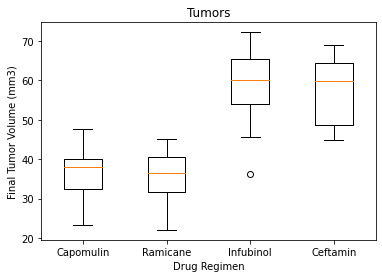

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
iqr_data = [capomulin_drug["Tumor Volume (mm3)"],
            ramicane_drug["Tumor Volume (mm3)"],
            infubinol_drug["Tumor Volume (mm3)"],
            ceftamin_drug["Tumor Volume (mm3)"]]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(iqr_data, labels=drug_keeps)

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

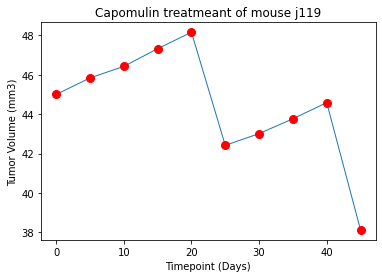

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
328,j119,Capomulin,Female,7,23,0,45.000000,0
329,j119,Capomulin,Female,7,23,5,45.838998,0
330,j119,Capomulin,Female,7,23,10,46.425366,0
331,j119,Capomulin,Female,7,23,15,47.322984,0
332,j119,Capomulin,Female,7,23,20,48.158209,1
333,j119,Capomulin,Female,7,23,25,42.417166,1
334,j119,Capomulin,Female,7,23,30,43.013681,1
335,j119,Capomulin,Female,7,23,35,43.765705,1
336,j119,Capomulin,Female,7,23,40,44.585090,1
337,j119,Capomulin,Female,7,23,45,38.125164,1


In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timeTumor_versus = mouse_merged_data[mouse_merged_data["Mouse ID"].isin(["j119"])]

plt.title('Capomulin treatmeant of mouse j119')
plt.plot(timeTumor_versus[["Timepoint"]], timeTumor_versus[["Tumor Volume (mm3)"]],linewidth=1, 
         ms=8, marker="o", mfc = 'r', mec='r')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()
timeTumor_versus

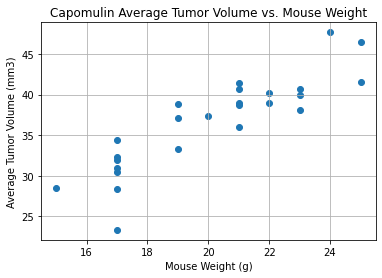

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_drug.groupby(["Mouse ID"]).mean()

plt.title("Capomulin Average Tumor Volume vs. Mouse Weight")
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.grid()
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig("scatterplot")
plt.show()

## Correlation and Regression

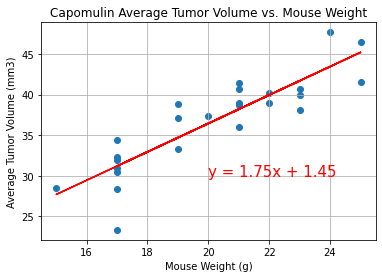

The correlation between mouse weight and average tumor volume is 0.88


,Timepoint,Tumor Volume (mm3),Age_months,Weight (g),Metastatic Sites
Mouse ID,,,,,
b128,45,38.982878,9,22,2
b742,45,38.939633,7,21,0
f966,20,30.485985,16,17,0
g288,45,37.074024,3,19,1
g316,45,40.159220,22,22,2


In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = round(capomulin_avg["Weight (g)"].corr(capomulin_avg["Tumor Volume (mm3)"]),2)

x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Capomulin Average Tumor Volume vs. Mouse Weight")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print(f"The correlation between mouse weight and average tumor volume is {corr}")
capomulin_avg.head()